<h1>Taller en casa</h1>
<!----Hey hey!!!---->

<h2>Asignatura: Estadistica 2</h2>

<h3>Profesor: Carlos Alfonso Mantilla Duarte
<br>
Grupo: F1</h3>

<h4>Andrés Felipe Uribe García - 2160793
<br>Julián Orlando Rodríguez Villamizar - 2170137
<br>Isabel Cristina Gómez Balvin - 2171895 </h4>

<br>El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0
<br>
<br>Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.
<br>
<br>Las variables registradas son las siguientes:
<br>
<br>age - edad
<br>job- tipo de trabajo
<br>marital - estado civil
<br>education - nivel educativo
<br>default - crédito en incumplimiento
<br>housing - crédito de vivienda
<br>loan - préstamos personal
<br>contact - tipo de contacto realizado
<br>month - mes en que se hizo el último contacto
<br>day_of_week - último día de contacto de la semana
<br>duration - duración del último contacto, en segundos
<br>campaign - número de contactos realizados durante esta campaña y para este cliente
<br>pdays - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
<br>previous- número de contactos realizados antes de esta campaña y para este cliente
<br>poutcome - resultado de la campaña de marketing anterior
<br>emp.var.rate- tasa de variación del empleo - indicador trimestral
<br>cons.price.idx - índice de precios al consumidor - indicador mensual
<br>cons.conf.idx - índice de confianza del consumidor - indicador mensual
<br>euribor3m - euribor tasa de 3 meses - indicador diario
<br>nr.employed - número de empleados
<br>y - ¿el cliente ha suscrito un depósito a plazo?
<br>
<br>Los datos fueron tomados de: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS
</pr>

## Las librerias necesarias

In [1]:
library(samplingbook)
library('SamplingUtil')
library(dplyr)
library(magrittr)
library(bbmle)
library(stats4)
library(rafalib)
library("readr")
library(corrplot)
library("ggplot2")#para graficar 
library("dplyr")#usar select

Warning message:
"package 'samplingbook' was built under R version 4.0.2"
Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survival'


The following objects are masked from 'package:sampling':

    cluster, strata



Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'bbmle' was built under R version 4.0.2"
Loading required package: stats4


Attaching package: 'bbmle'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'corrplot' was built under R version 4.0.2"
corrplot 0.84 loaded



In [2]:
dataset <- read.csv("bank-additional-full.csv", header=TRUE,sep=";" )

## Importación del dataset

In [3]:
#Rellenamos los espacios faltantes con su media correspondiente
#pues de omitirlos podriamos perder informacion importante
R<-data.frame(#Variables continuas
                Edad=dataset$age,
                Dur=dataset$duration,
                NDias=dataset$pdays,
                Camp=dataset$campaign,
                TVE=dataset$emp.var.rate,
                IPC=dataset$cons.price.idx,
                ICC=dataset$cons.conf.idx,
                Eu=dataset$euribor3m,
                NE=dataset$nr.employed,
                
    
              #Variables No Continuas
                Trab=dataset$job,
                EstCv=dataset$marital,
                NvEduc=dataset$education,
                CredInc=dataset$default,
                CredViv=dataset$housing,
                CredPer=dataset$loan,
                Cont=dataset$contact,
                Mes=dataset$month,
                Dia=dataset$day_of_week,
                NPrev=dataset$previous,
                RPrev=dataset$poutcome,
                Sus=dataset$y)


In [4]:
head(R)
tail(R)

,Edad,Dur,NDias,Camp,TVE,IPC,ICC,Eu,NE,Trab,...,NvEduc,CredInc,CredViv,CredPer,Cont,Mes,Dia,NPrev,RPrev,Sus
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,56,261,999,1,1.1,93.994,-36.4,4.857,5191,housemaid,...,basic.4y,no,no,no,telephone,may,mon,0,nonexistent,no
2,57,149,999,1,1.1,93.994,-36.4,4.857,5191,services,...,high.school,unknown,no,no,telephone,may,mon,0,nonexistent,no
3,37,226,999,1,1.1,93.994,-36.4,4.857,5191,services,...,high.school,no,yes,no,telephone,may,mon,0,nonexistent,no
4,40,151,999,1,1.1,93.994,-36.4,4.857,5191,admin.,...,basic.6y,no,no,no,telephone,may,mon,0,nonexistent,no
5,56,307,999,1,1.1,93.994,-36.4,4.857,5191,services,...,high.school,no,no,yes,telephone,may,mon,0,nonexistent,no
6,45,198,999,1,1.1,93.994,-36.4,4.857,5191,services,...,basic.9y,unknown,no,no,telephone,may,mon,0,nonexistent,no


,Edad,Dur,NDias,Camp,TVE,IPC,ICC,Eu,NE,Trab,...,NvEduc,CredInc,CredViv,CredPer,Cont,Mes,Dia,NPrev,RPrev,Sus
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
41183,29,112,9,1,-1.1,94.767,-50.8,1.028,4963.6,unemployed,...,basic.4y,no,yes,no,cellular,nov,fri,1,success,no
41184,73,334,999,1,-1.1,94.767,-50.8,1.028,4963.6,retired,...,professional.course,no,yes,no,cellular,nov,fri,0,nonexistent,yes
41185,46,383,999,1,-1.1,94.767,-50.8,1.028,4963.6,blue-collar,...,professional.course,no,no,no,cellular,nov,fri,0,nonexistent,no
41186,56,189,999,2,-1.1,94.767,-50.8,1.028,4963.6,retired,...,university.degree,no,yes,no,cellular,nov,fri,0,nonexistent,no
41187,44,442,999,1,-1.1,94.767,-50.8,1.028,4963.6,technician,...,professional.course,no,no,no,cellular,nov,fri,0,nonexistent,yes
41188,74,239,999,3,-1.1,94.767,-50.8,1.028,4963.6,retired,...,professional.course,no,yes,no,cellular,nov,fri,1,failure,no


## Coeficientes de correlación Simple

,Edad,Dur,NDias,Camp,TVE,IPC,ICC,Eu,NE
Edad,1.0000000000,-0.000865705,-0.03436895,0.00459358,-0.0003706855,0.000856715,0.129371614,0.01076743,-0.01772513
Dur,-0.0008657050,1.000000000,-0.04757702,-0.07169923,-0.0279678845,0.005312268,-0.008172873,-0.03289666,-0.04470322
NDias,-0.0343689512,-0.047577015,1.00000000,0.05258357,0.2710041743,0.078889109,-0.091342354,0.29689911,0.37260474
Camp,0.0045935805,-0.071699226,0.05258357,1.00000000,0.1507538056,0.127835912,-0.013733099,0.13513251,0.14409489
TVE,-0.0003706855,-0.027967884,0.27100417,0.15075381,1.0000000000,0.775334171,0.196041268,0.97224467,0.90697010
IPC,0.0008567150,0.005312268,0.07888911,0.12783591,0.7753341708,1.000000000,0.058986182,0.68823011,0.52203398
ICC,0.1293716142,-0.008172873,-0.09134235,-0.01373310,0.1960412681,0.058986182,1.000000000,0.27768622,0.10051343
Eu,0.0107674295,-0.032896656,0.29689911,0.13513251,0.9722446712,0.688230107,0.277686220,1.00000000,0.94515443
NE,-0.0177251319,-0.044703223,0.37260474,0.14409489,0.9069701013,0.522033977,0.100513432,0.94515443,1.00000000


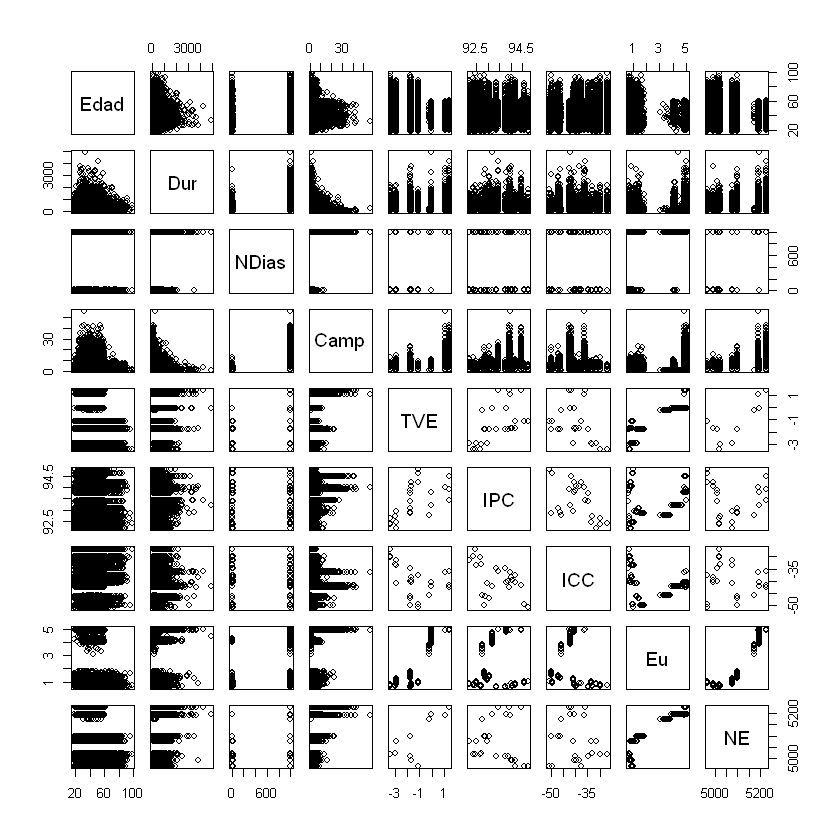

In [5]:
plot(R[,1:9])
cor(R[,1:9])

In [6]:
summary(R)

      Edad            Dur             NDias            Camp       
 Min.   :17.00   Min.   :   0.0   Min.   :  0.0   Min.   : 1.000  
 1st Qu.:32.00   1st Qu.: 102.0   1st Qu.:999.0   1st Qu.: 1.000  
 Median :38.00   Median : 180.0   Median :999.0   Median : 2.000  
 Mean   :40.02   Mean   : 258.3   Mean   :962.5   Mean   : 2.568  
 3rd Qu.:47.00   3rd Qu.: 319.0   3rd Qu.:999.0   3rd Qu.: 3.000  
 Max.   :98.00   Max.   :4918.0   Max.   :999.0   Max.   :56.000  
      TVE                IPC             ICC              Eu       
 Min.   :-3.40000   Min.   :92.20   Min.   :-50.8   Min.   :0.634  
 1st Qu.:-1.80000   1st Qu.:93.08   1st Qu.:-42.7   1st Qu.:1.344  
 Median : 1.10000   Median :93.75   Median :-41.8   Median :4.857  
 Mean   : 0.08189   Mean   :93.58   Mean   :-40.5   Mean   :3.621  
 3rd Qu.: 1.40000   3rd Qu.:93.99   3rd Qu.:-36.4   3rd Qu.:4.961  
 Max.   : 1.40000   Max.   :94.77   Max.   :-26.9   Max.   :5.045  
       NE           Trab              EstCv            

## Coeficientes de correlación Multiple

In [7]:
#Funcion para calcular el Coeficiente de correlacion multiple.
rho.mult<-function(datos)
# datos: matriz con las variables del problema.
# La primera columna debe ser la variable respuesta.
# Las restantes p-1 columnas son las variables explicativas.
{
matriz<-var(datos)
# calculo
n<-nrow(datos)
p<-ncol(matriz)
sxx<-matriz[2:p,2:p]
syx<-matrix(matriz[1,2:p],nrow=1)
sxy<-t(syx)
#coeficiente
rho.mult<-sqrt(syx%*%solve(sxx)%*%sxy)/sqrt(matriz[1,1])
cat("\n Coeficiente de correlacion multiple: ",rho.mult,"\n")
#estadistico
if(abs(rho.mult)==1)
stop("Imposible resolver contraste.
Coeficiente de correlacion multiple igual a 1", call. = FALSE)
else{
est<-((n-(p-1)-1)*rho.mult)/((p-1)*(1-rho.mult^2))
#grafico
par(mfrow=c(1,1))
x<-seq(0,qf(0.999,p-1,n-(p-1)-1),length=500)
plot(x,df(x,p-1,n-(p-1)-1),type="l",ylab="densidad",
main="Contraste Correlacion Multiple")
abline(v=qf(0.975,p-1,n-(p-1)-1),col="red")
abline(v=qf(0.025,p-1,n-(p-1)-1),col="red")
abline(v=est,col="blue")
abline(h=0)
legend(qf(0.98,p-1,n-(p-1)-1),pf((p+3)/(n-p),p-1,n-(p-1)-1),
c("Estadistico","Region Critica"),lty=rep(1,2),
col=c("blue","red"),bty="n")
cat("\n Estadistico de contraste: ",round(est,3),"\n")
cat("\n p-valor: ",round(2*(1-pf(est,p-1,n-(p-1)-1)),3),"\n\n")}
return(invisible())
}


 Coeficiente de correlacion multiple:  0.1353495 

 Estadistico de contraste:  709.696 

 p-valor:  0 



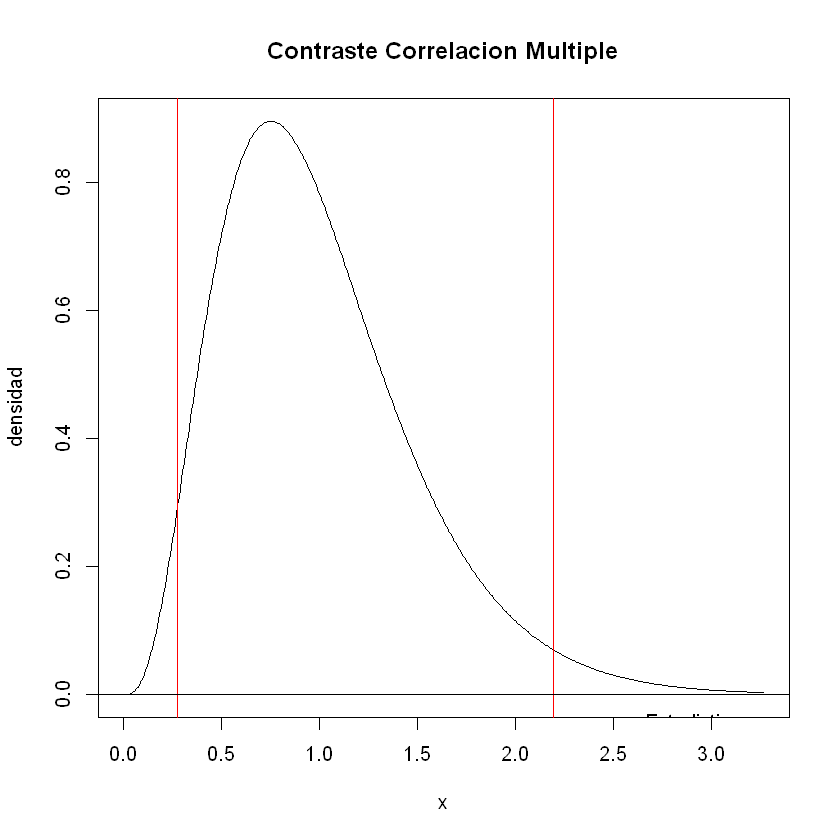

In [8]:
rho.mult(R[,1:9])

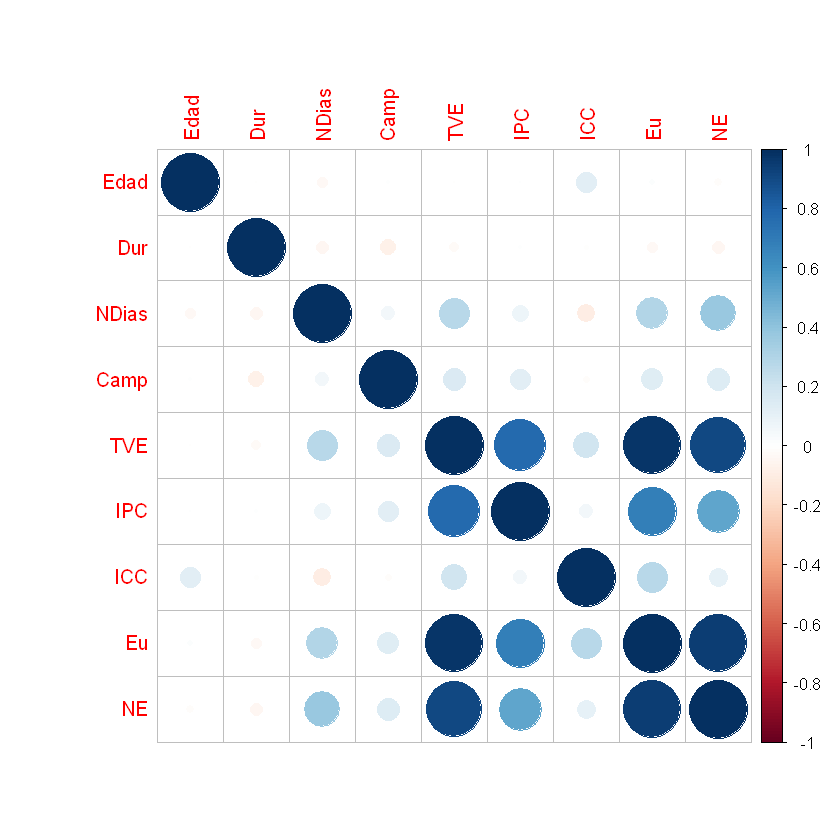

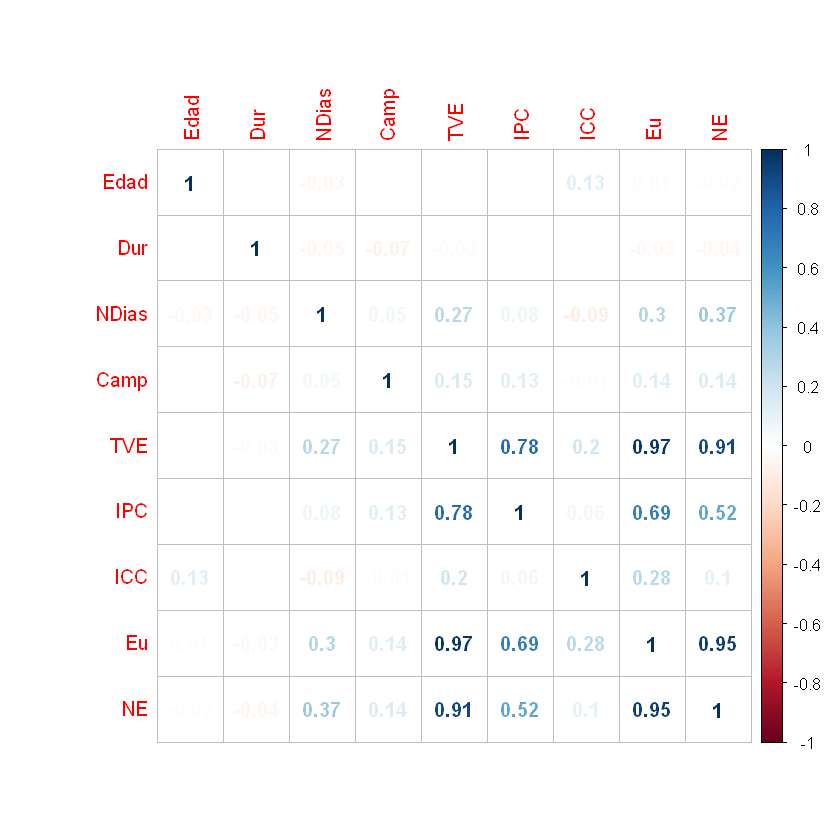

In [9]:
C<-cor(R[,1:9]) #Continuos
corrplot(C, method="circle")
corrplot(C, method="number")

## Generacion del modelo lineal
<br>
<H2>1. Modelo lineal multiple </H2>
<br>
Vamos a generar el modelo con todos los predictores de "Conti", tomando como variable dependiente de nuestro modelo a tasa de variacion de empleo ("tasa").

In [10]:
Conti <- R[,1:9]
modeloMultiple <- lm(TVE ~ . , data = Conti)
summary(modeloMultiple)


Call:
lm(formula = TVE ~ ., data = Conti)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31528 -0.13576 -0.02173  0.15430  0.79916 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.057e+01  9.119e-01 -77.387  < 2e-16 ***
Edad        -4.276e-04  1.305e-04  -3.278  0.00105 ** 
Dur         -1.454e-06  5.219e-06  -0.279  0.78049    
NDias       -5.233e-05  7.933e-06  -6.596 4.28e-11 ***
Camp         4.906e-03  4.950e-04   9.911  < 2e-16 ***
IPC          5.942e-01  5.070e-03 117.191  < 2e-16 ***
ICC         -1.013e-02  4.699e-04 -21.562  < 2e-16 ***
Eu           6.585e-01  5.319e-03 123.804  < 2e-16 ***
NE           2.382e-03  1.036e-04  22.981  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2734 on 41179 degrees of freedom
Multiple R-squared:  0.9697,	Adjusted R-squared:  0.9697 
F-statistic: 1.648e+05 on 8 and 41179 DF,  p-value: < 2.2e-16


# -
Podemos decir que el modelo es capaz de explicar un 96,97 % de la varianza y que el p-value es significativo (2.2*10^-16), por lo que podemos decir que el modelo es útil y que existe una relación entre los predictores y la variable respuesta (al menos uno de los coeficientes es distinto a 0)
<br>
<br>
ahora seleccionaremos el predictor del modelo con la funcionstep():

In [11]:
step(modeloMultiple, direction = "both", trace = 1)

Start:  AIC=-106817.7
TVE ~ Edad + Dur + NDias + Camp + IPC + ICC + Eu + NE

        Df Sum of Sq    RSS     AIC
- Dur    1      0.01 3078.0 -106820
<none>               3078.0 -106818
- Edad   1      0.80 3078.8 -106809
- NDias  1      3.25 3081.3 -106776
- Camp   1      7.34 3085.4 -106722
- ICC    1     34.75 3112.8 -106357
- NE     1     39.48 3117.5 -106295
- IPC    1   1026.56 4104.6  -94965
- Eu     1   1145.70 4223.7  -93787

Step:  AIC=-106819.6
TVE ~ Edad + NDias + Camp + IPC + ICC + Eu + NE

        Df Sum of Sq    RSS     AIC
<none>               3078.0 -106820
+ Dur    1      0.01 3078.0 -106818
- Edad   1      0.80 3078.8 -106811
- NDias  1      3.25 3081.3 -106778
- Camp   1      7.40 3085.4 -106723
- ICC    1     34.75 3112.8 -106359
- NE     1     39.51 3117.6 -106296
- IPC    1   1026.59 4104.6  -94967
- Eu     1   1145.79 4223.8  -93788



Call:
lm(formula = TVE ~ Edad + NDias + Camp + IPC + ICC + Eu + NE, 
    data = Conti)

Coefficients:
(Intercept)         Edad        NDias         Camp          IPC          ICC  
 -7.057e+01   -4.276e-04   -5.226e-05    4.915e-03    5.942e-01   -1.013e-02  
         Eu           NE  
  6.585e-01    2.382e-03  


## -
Podemos notar que la variable con mayor p-value ha sido excluida del modelo, porque no ayudaba en gran medida en la variabilidad de "y"

In [12]:
modeloMultiplestep <- update(modeloMultiple, formula = ~ . -Dur)
summary(modeloMultiplestep)


Call:
lm(formula = TVE ~ Edad + NDias + Camp + IPC + ICC + Eu + NE, 
    data = Conti)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3149 -0.1358 -0.0217  0.1544  0.7991 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.057e+01  9.118e-01 -77.393  < 2e-16 ***
Edad        -4.276e-04  1.305e-04  -3.278  0.00105 ** 
NDias       -5.226e-05  7.930e-06  -6.591 4.43e-11 ***
Camp         4.915e-03  4.938e-04   9.953  < 2e-16 ***
IPC          5.942e-01  5.070e-03 117.194  < 2e-16 ***
ICC         -1.013e-02  4.699e-04 -21.560  < 2e-16 ***
Eu           6.585e-01  5.318e-03 123.811  < 2e-16 ***
NE           2.382e-03  1.036e-04  22.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2734 on 41180 degrees of freedom
Multiple R-squared:  0.9697,	Adjusted R-squared:  0.9697 
F-statistic: 1.884e+05 on 7 and 41180 DF,  p-value: < 2.2e-16


In [13]:
confint(modeloMultiplestep)

,2.5 %,97.5 %
(Intercept),-7.235721e+01,-6.878276e+01
Edad,-6.832619e-04,-1.718828e-04
NDias,-6.780317e-05,-3.671908e-05
Camp,3.947015e-03,5.882817e-03
IPC,5.842581e-01,6.041335e-01
ICC,-1.105158e-02,-9.209658e-03
Eu,6.480486e-01,6.688968e-01
NE,2.179226e-03,2.585425e-03


veamos como se comporta el modelo

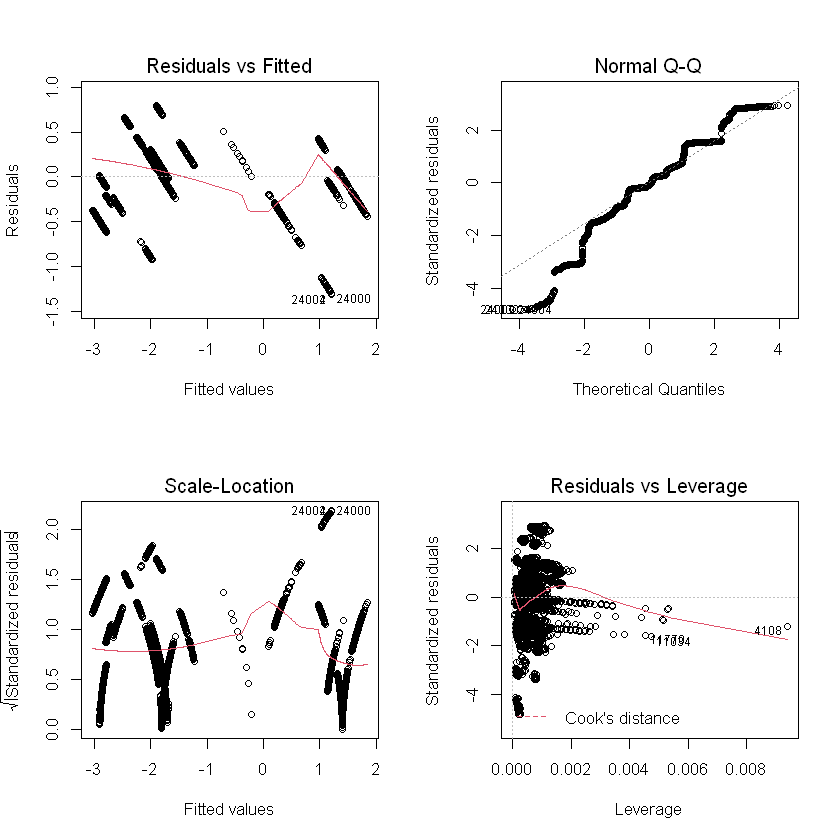

In [14]:
par(mfrow=c(2,2))
plot(modeloMultiplestep)

<H2>2. Modelo lineal simple </H2>
<br>
<H4> Tasa de variación de empleo & Índice de Precios al Consumidor </H4>

In [15]:
varsel<-Conti[,c(5,6)]
summary(varsel)

      TVE                IPC       
 Min.   :-3.40000   Min.   :92.20  
 1st Qu.:-1.80000   1st Qu.:93.08  
 Median : 1.10000   Median :93.75  
 Mean   : 0.08189   Mean   :93.58  
 3rd Qu.: 1.40000   3rd Qu.:93.99  
 Max.   : 1.40000   Max.   :94.77  

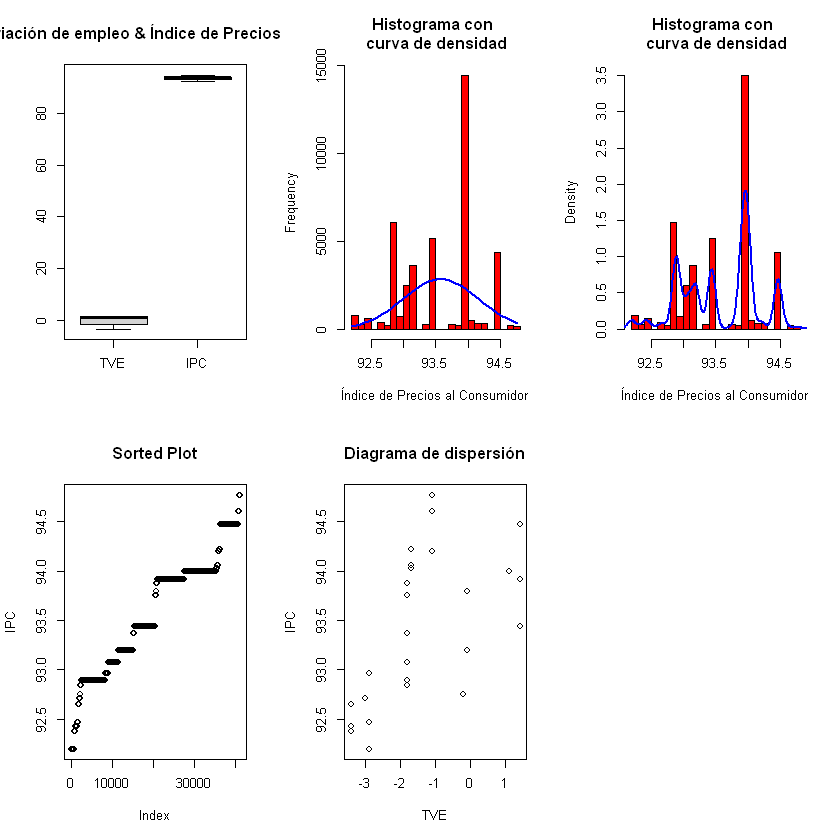

In [16]:
# Algunos gráficos exploratorios
par(mfrow=c(2,3))
x <- varsel$IPC
boxplot(varsel, main="Tasa de variación de empleo & Índice de Precios al Consumidor")
h<-hist(x, breaks=25, col="red", xlab="Índice de Precios al Consumidor", main="Histograma con \n curva de densidad")
xfit<-seq(min(x), max(x), length=40)
yfit<-dnorm(xfit, mean=mean(x), sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)
h<-hist(x, freq = F, breaks=25, col="red", xlab="Índice de Precios al Consumidor", main="Histograma con \n curva de densidad")
lines(density(x), col="blue", lwd=2)
plot(sort(x),ylab="IPC", main = "Sorted Plot")
with(Conti, plot(TVE,IPC, main = "Diagrama de dispersión"))
par(mfrow=c(1,1))

generamos el modelo lineal por regresion simple:

In [17]:
regresion <- lm(IPC ~ TVE, data = Conti)
summary(regresion)


Call:
lm(formula = IPC ~ TVE, data = Conti)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73913 -0.19504 -0.03423  0.12748  1.52898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 93.552271   0.001804 51865.4   <2e-16 ***
TVE          0.285682   0.001147   249.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3656 on 41186 degrees of freedom
Multiple R-squared:  0.6011,	Adjusted R-squared:  0.6011 
F-statistic: 6.207e+04 on 1 and 41186 DF,  p-value: < 2.2e-16


Los parámetros de la ecuación de la recta de mínimos cuadrados que relaciona el indice de precios al consumidor en función de la tasa de variacion de empleo vienen dados por la columna ´Estimate´ de la tabla ´Coefficients´ de la salida anterior. Por lo tanto, en este ejemplo la ecuación de la recta de mínimos cuadrados es:

<p style='text-align: center;'>$y = 93.552271 + 0.285682x + 0.3656$</p>

In [18]:
with(R, cor.test(IPC,TVE))


	Pearson's product-moment correlation

data:  IPC and TVE
t = 249.15, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7714531 0.7791575
sample estimates:
      cor 
0.7753342 


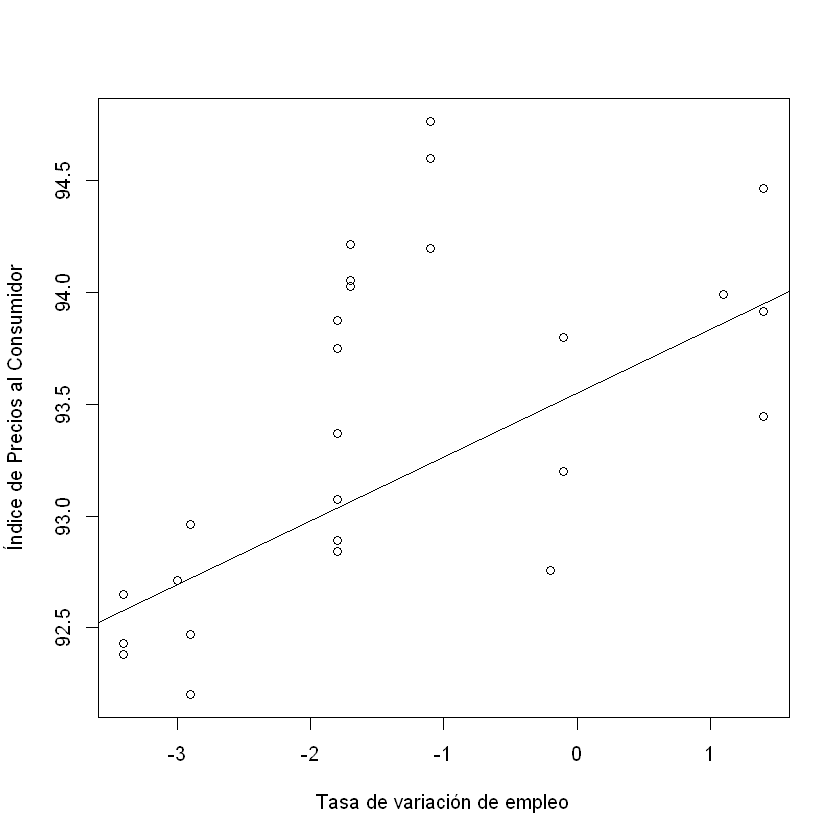

In [19]:
plot(Conti$TVE, Conti$IPC, xlab='Tasa de variación de empleo', ylab='Índice de Precios al Consumidor')
abline(regresion)

In [20]:
indiceTasa <- data.frame(TVE= seq(-3, 1))
predict(regresion, indiceTasa)

1        2        3        4        5 
92.69523 92.98091 93.26659 93.55227 93.83795

Los intervalos de confianza para los parámetros los obtendremos con el comando confint. El parámetro level permite elegir el nivel de confianza (por defecto es 0.95)

In [21]:
confint(regresion)
confint(regresion, level = 0.90)

,2.5 %,97.5 %
(Intercept),93.5487358,93.5558066
TVE,0.2834343,0.2879292


,5 %,95 %
(Intercept),93.5493042,93.5552381
TVE,0.2837956,0.2875678


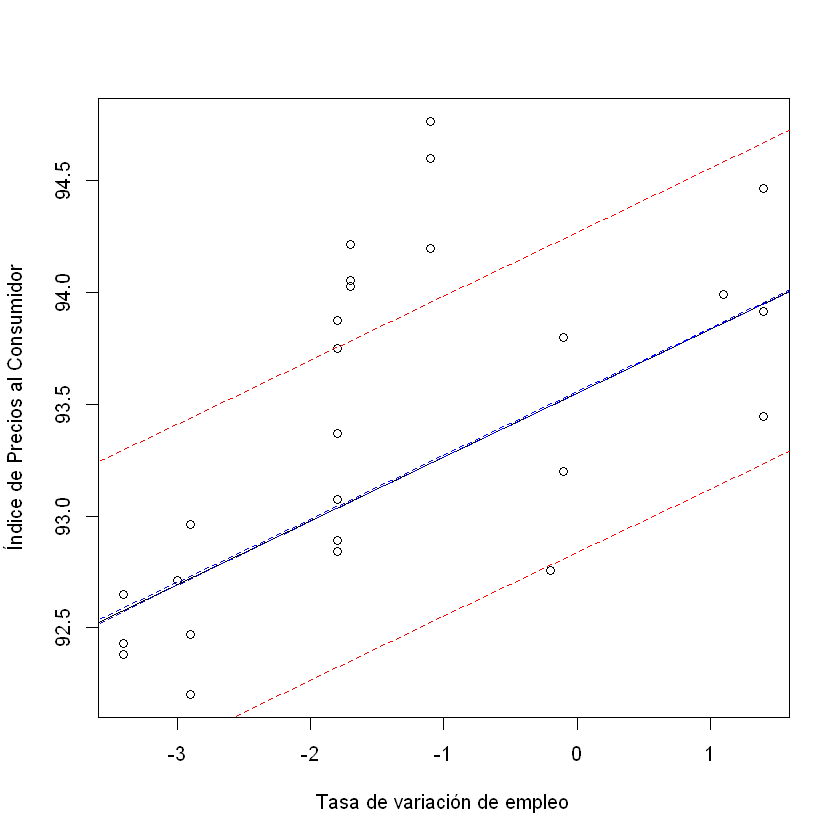

In [22]:
indiceTasa <- data.frame(TVE = seq(-4, 2))
# Grafico de dispersion y recta
plot(Conti$TVE, Conti$IPC, xlab='Tasa de variación de empleo', ylab='Índice de Precios al Consumidor')
abline(regresion)

# Intervalos de confianza de la respuesta media:
# ic es una matriz con tres columnas: la primera es la prediccion, las otras dos son los extremos del intervalo
ic <- predict(regresion, indiceTasa, interval = 'confidence',se.regresion=T)
lines(indiceTasa$TVE, ic[, 2], lty = 2, col='blue')
lines(indiceTasa$TVE, ic[, 3], lty = 2,col='blue')

# Intervalos de prediccion
ic <- predict(regresion, indiceTasa, interval = 'prediction')
lines(indiceTasa$TVE, ic[, 2], lty = 2, col = 'red')
lines(indiceTasa$TVE, ic[, 3], lty = 2, col = 'red')

In [23]:
anova(regresion)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TVE,1,8295.740,8295.7403874,62074.09,0
Residuals,41186,5504.203,0.1336426,NA,NA


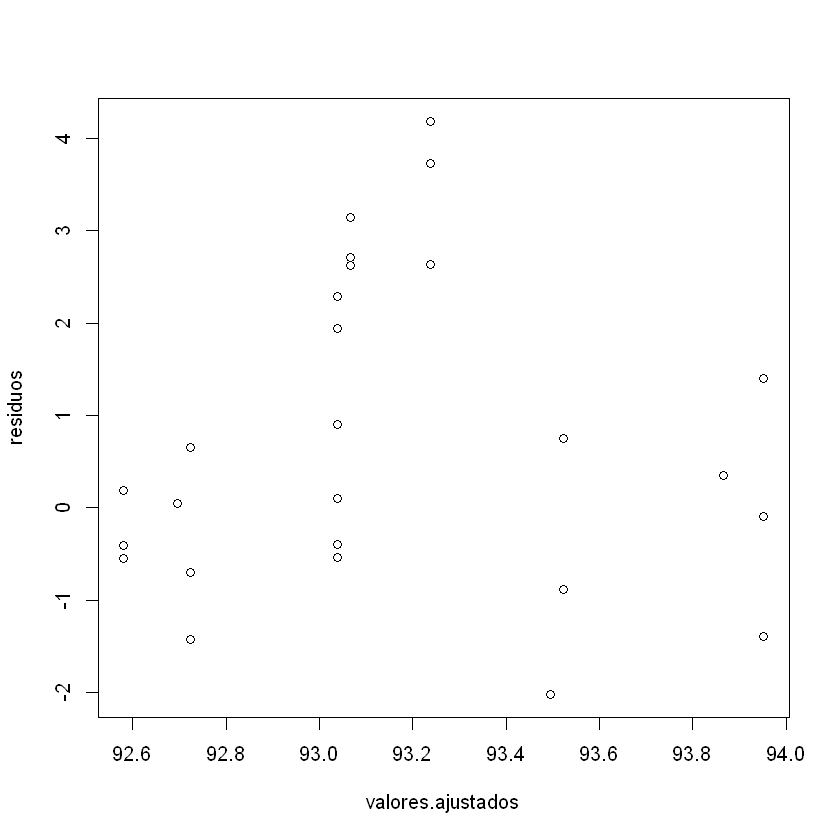

In [24]:
residuos <- rstandard(regresion)
valores.ajustados <- fitted(regresion)
plot(valores.ajustados, residuos)

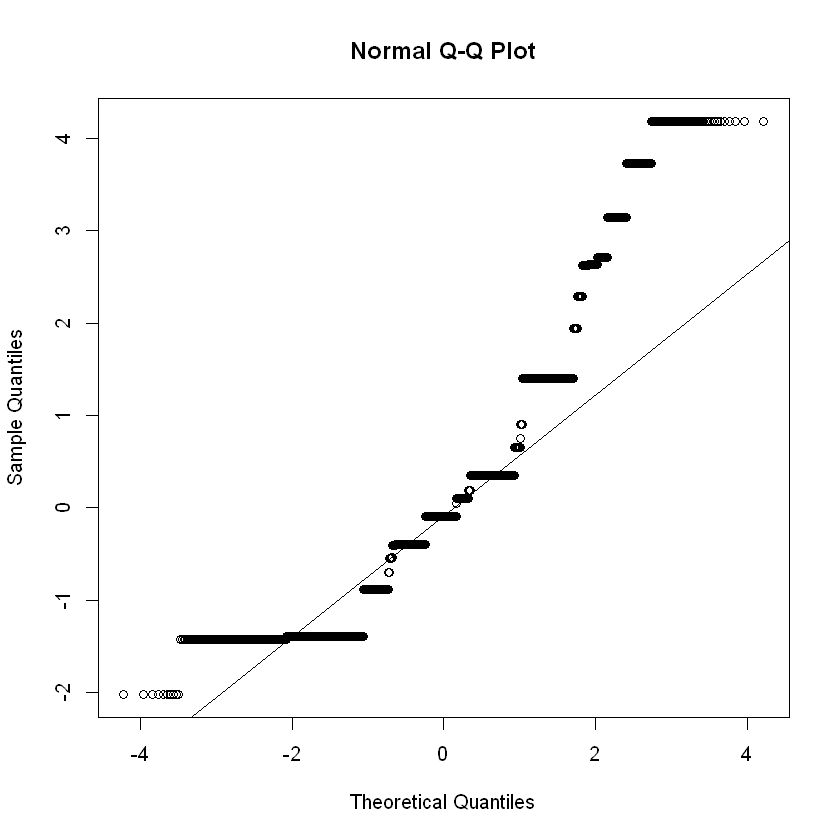

In [25]:
qqnorm(residuos)
qqline(residuos)

Se graficó por segunda vez variando el metodo para verificar, esto co la libreria ("ggplot2")

Warning message in predict.lm(regresion, interval = "prediction"):
"predictions on current data refer to _future_ responses
"
`geom_smooth()` using formula 'y ~ x'



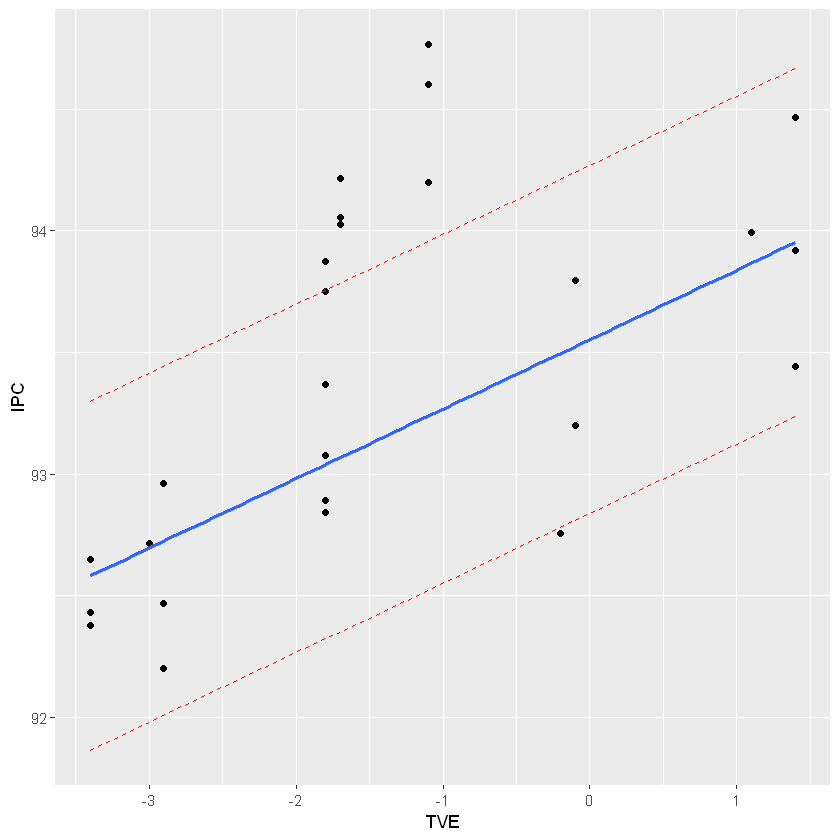

In [26]:

# 1. Add predictions 
pred.int <- predict(regresion, interval = "prediction")
mydata <- cbind(Conti, pred.int)
# 2. Regression line + confidence intervals

p <- ggplot(mydata, aes(TVE, IPC)) +
  geom_point() +
  stat_smooth(method = lm)
# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed")+
    geom_line(aes(y = upr), color = "red", linetype = "dashed")

<H4> Tasa de Variacion de Empleo y Euribor </H4>

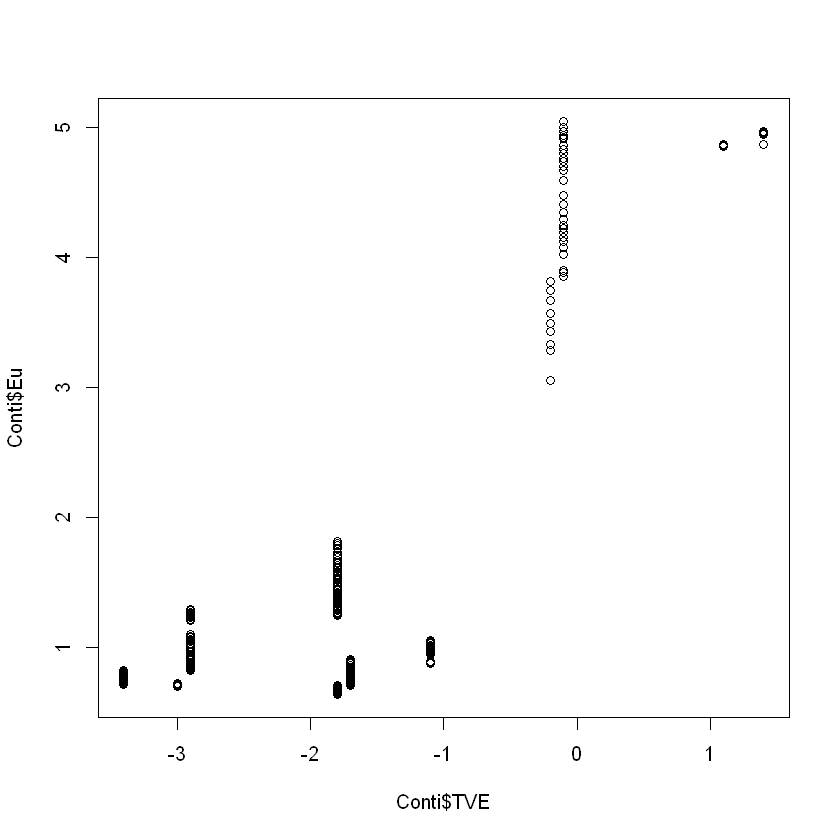

In [27]:
plot(Conti$TVE,Conti$Eu)

In [28]:
modelo <- lm(Eu ~ TVE, data=Conti)
summary(modelo)


Call:
lm(formula = Eu ~ TVE, data = Conti)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47663 -0.17219 -0.07319  0.14284  1.61895 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.533393   0.002002  1764.7   <2e-16 ***
TVE         1.073425   0.001273   843.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4058 on 41186 degrees of freedom
Multiple R-squared:  0.9453,	Adjusted R-squared:  0.9453 
F-statistic: 7.112e+05 on 1 and 41186 DF,  p-value: < 2.2e-16


In [29]:
with(R, cor.test(Eu,TVE))


	Pearson's product-moment correlation

data:  Eu and TVE
t = 843.33, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9717110 0.9727684
sample estimates:
      cor 
0.9722447 


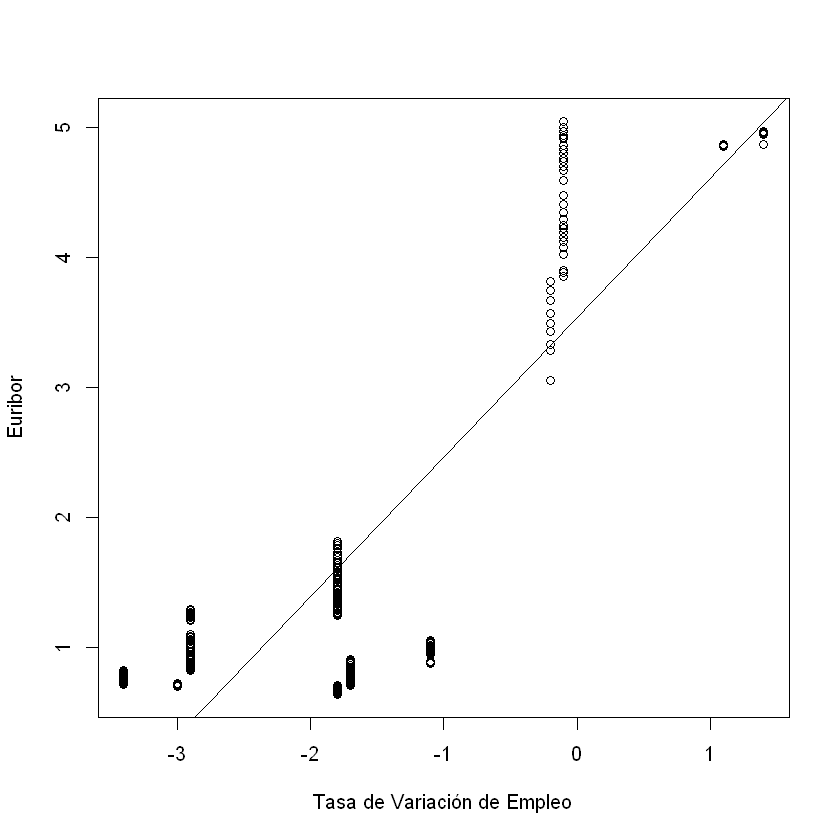

In [30]:
plot(Conti$TVE, Conti$Eu, xlab='Tasa de Variación de Empleo', ylab='Euribor')
abline(modelo)

In [31]:
confint(modelo)

,2.5 %,97.5 %
(Intercept),3.529468,3.537317
TVE,1.070930,1.075920


In [32]:
confint(modelo, level = 0.90)

,5 %,95 %
(Intercept),3.530099,3.536686
TVE,1.071331,1.075519


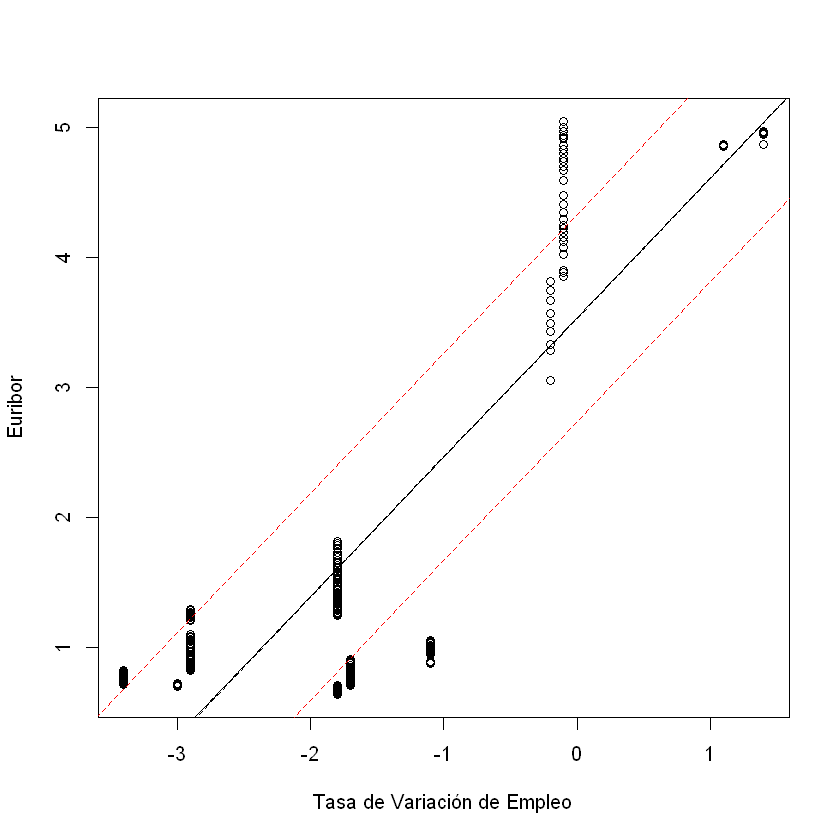

In [33]:
nuevasTasa <- data.frame(TVE = seq(-5, 3))
# Grafico de dispersion y recta
plot(Conti$TVE, Conti$Eu ,xlab = "Tasa de Variación de Empleo", ylab = "Euribor" )
abline(modelo)

# Intervalos de confianza de la respuesta media:
# ic es una matriz con tres columnas: la primera es la prediccion, las otras dos son los extremos del intervalo
ic <- predict(modelo, nuevasTasa, interval = 'confidence')
lines(nuevasTasa$TVE, ic[, 2], lty = 2)
lines(nuevasTasa$TVE, ic[, 3], lty = 2)

# Intervalos de prediccion
ic <- predict(modelo, nuevasTasa, interval = 'prediction')
lines(nuevasTasa$TVE, ic[, 2], lty = 2, col = 'red')
lines(nuevasTasa$TVE, ic[, 3], lty = 2, col = 'red')

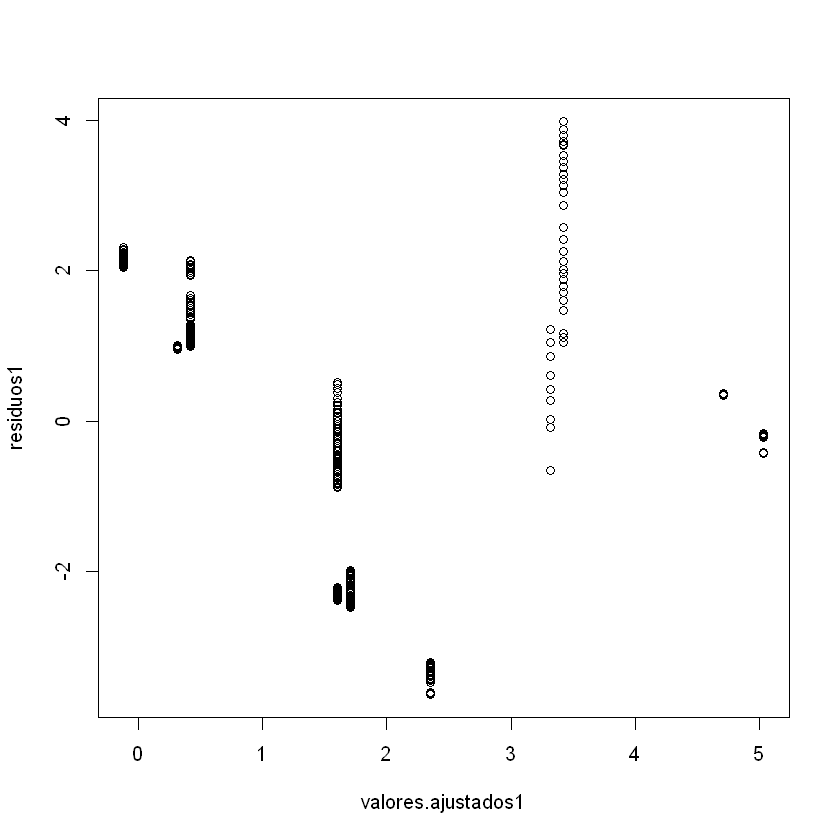

In [34]:
residuos1 <- rstandard(modelo)
valores.ajustados1 <- fitted(modelo)
plot(valores.ajustados1, residuos1)

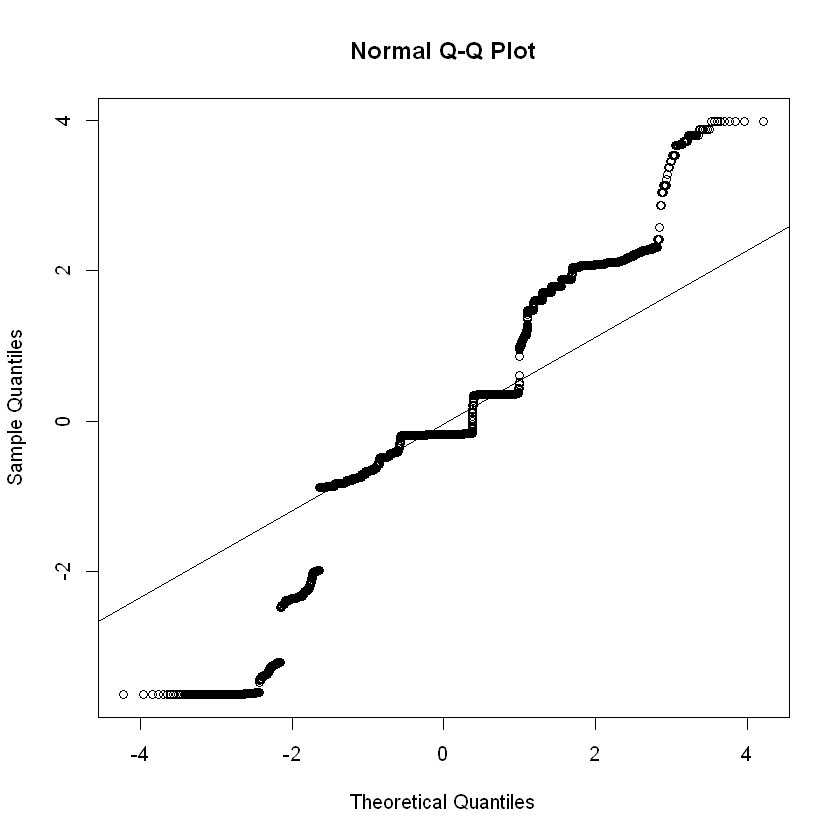

In [35]:
qqnorm(residuos1)
qqline(residuos1)